<a href="https://colab.research.google.com/github/LauraCosati/ecovendas/blob/master/C%C3%B3pia_de_Untitled2_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Prova SIEP
Aluna: Laura Cosati de Carvalho e Silva
Matrícula: 231013420

In [ ]:
!pip install imbalanced-learn

**Diagnóstico e SMOTE**

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE

df = pd.read_csv("credit_customers.csv")
X = pd.get_dummies(df.drop(columns=['class']))
y = LabelEncoder().fit_transform(df['class'])

print("Distribuição antes do SMOTE:")
print(pd.Series(y).value_counts(normalize=True))

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

print("Distribuição após o SMOTE:")
print(pd.Series(y_resampled).value_counts(normalize=True))



Distribuição antes do SMOTE:
1    0.7
0    0.3
Name: proportion, dtype: float64
Distribuição após o SMOTE:
1    0.5
0    0.5
Name: proportion, dtype: float64


**Análise: **

A análise entre os bons e mals pagadores mostrou um desbalanceamento significativo na base de dados. Antes do balanceamento, 70% dos clientes foram classificados como "bons pagadores" e 30% como "maus pagadores". Para melhorar esse desequilibrio, apliquei a técnica SMOTE. Foi escolhido, pois é uma abordagem eficaz para gerar as amostras, nesse caso, dos maus pagadores. Com isso, garantimos que ele "aprenda" as características das duas classes e melhore a capacidade de detectar a classe minoritária, sendo crucial para identificar os riscos.
Depois da implementação do SMOTE, o balanciamento das classes foi feito, para 50% cada, fazendo com que os próximos modelos já sejam treinados para uma distribuição justa.

**Treinamento de Modelos**

Dados balanceados e prontos para o treinamento dos modelos.
Formato de X_resampled: (1400, 61)
Formato de y_resampled: (1400,)
Distribuição das classes após SMOTE:
1    0.5
0    0.5
Name: proportion, dtype: float64

Treinando e avaliando: K-Nearest Neighbors...

Treinando e avaliando: Support Vector Machine...

Treinando e avaliando: Decision Tree...

Treinando e avaliando: Random Forest...

Treinando e avaliando: AdaBoost...

Treinando e avaliando: Gradient Boosting...

Treinando e avaliando: XGBoost...

Treinando e avaliando: LightGBM...
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 560, number of negative: 560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001374 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1072
[LightGBM] [Info] Number of data points in the 

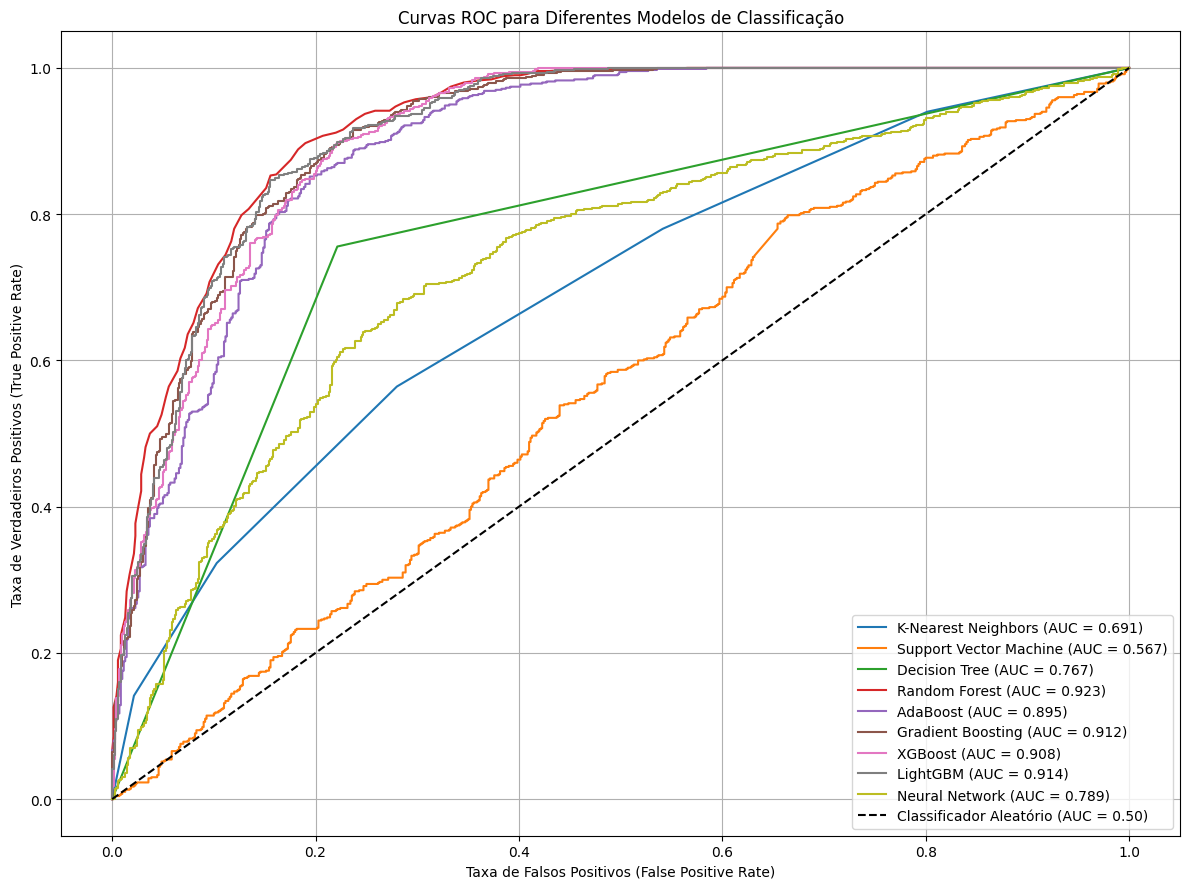


--- Matrizes de Confusão ---

Matriz de Confusão para K-Nearest Neighbors:
[[504 196]
 [305 395]]

Matriz de Confusão para Support Vector Machine:
[[258 442]
 [180 520]]

Matriz de Confusão para Decision Tree:
[[545 155]
 [171 529]]

Matriz de Confusão para Random Forest:
[[577 123]
 [ 88 612]]

Matriz de Confusão para AdaBoost:
[[570 130]
 [116 584]]

Matriz de Confusão para Gradient Boosting:
[[564 136]
 [101 599]]

Matriz de Confusão para XGBoost:
[[560 140]
 [101 599]]

Matriz de Confusão para LightGBM:
[[571 129]
 [ 97 603]]

Matriz de Confusão para Neural Network:
[[466 234]
 [205 495]]


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE # Certifique-se de que esta biblioteca esteja instalada


from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
import numpy as np
import warnings


warnings.filterwarnings("ignore")



try:
    df = pd.read_csv("credit_customers.csv")
except FileNotFoundError:
    print("Erro: 'credit_customers.csv' não encontrado. Certifique-se de que o arquivo está no diretório correto.")
    # Exit or handle the error appropriately
    exit()

X = pd.get_dummies(df.drop(columns=['class']))
y = LabelEncoder().fit_transform(df['class'])

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)


X_resampled.columns = X_resampled.columns.str.replace('[<>[\]]', '', regex=True)

print("Dados balanceados e prontos para o treinamento dos modelos.")
print(f"Formato de X_resampled: {X_resampled.shape}")
print(f"Formato de y_resampled: {y_resampled.shape}")
print("Distribuição das classes após SMOTE:")
print(pd.Series(y_resampled).value_counts(normalize=True))




models = {
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Support Vector Machine': SVC(probability=True, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'AdaBoost': AdaBoostClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    'LightGBM': LGBMClassifier(random_state=42),
    'Neural Network': MLPClassifier(random_state=42, max_iter=1000)
}


results = pd.DataFrame(columns=['Model', 'AUC', 'Precision', 'Recall', 'F1-Score'])
roc_curves_data = {}
confusion_matrices_data = {}


skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for name, model in models.items():
    print(f"\nTreinando e avaliando: {name}...")

    auc_scores = []
    precision_scores = []
    recall_scores = []
    f1_scores = []


    y_pred_proba_overall = np.array([])
    y_test_overall = np.array([])
    y_pred_overall = np.array([])

    for fold, (train_index, test_index) in enumerate(skf.split(X_resampled, y_resampled)):
        X_train, X_test = X_resampled.iloc[train_index], X_resampled.iloc[test_index]
        y_train, y_test = y_resampled[train_index], y_resampled[test_index]

        model.fit(X_train, y_train)


        if hasattr(model, "predict_proba"):
            y_pred_proba = model.predict_proba(X_test)[:, 1]
        elif hasattr(model, "decision_function"):
            y_pred_proba = model.decision_function(X_test)

            y_pred_proba = (y_pred_proba - y_pred_proba.min()) / (y_pred_proba.max() - y_pred_proba.min())
        else:

            y_pred_proba = model.predict(X_test)


        y_pred = (y_pred_proba > 0.5).astype(int)


        auc_scores.append(roc_auc_score(y_test, y_pred_proba))
        precision_scores.append(precision_score(y_test, y_pred))
        recall_scores.append(recall_score(y_test, y_pred))
        f1_scores.append(f1_score(y_test, y_pred))


        y_test_overall = np.append(y_test_overall, y_test)
        y_pred_proba_overall = np.append(y_pred_proba_overall, y_pred_proba)
        y_pred_overall = np.append(y_pred_overall, y_pred)



    avg_auc = np.mean(auc_scores)
    avg_precision = np.mean(precision_scores)
    avg_recall = np.mean(recall_scores)
    avg_f1 = np.mean(f1_scores)


    results = pd.concat([results, pd.DataFrame([{'Model': name, 'AUC': avg_auc, 'Precision': avg_precision, 'Recall': avg_recall, 'F1-Score': avg_f1}])], ignore_index=True)


    fpr, tpr, _ = roc_curve(y_test_overall, y_pred_proba_overall)
    roc_curves_data[name] = {'fpr': fpr, 'tpr': tpr}


    confusion_matrices_data[name] = confusion_matrix(y_test_overall, y_pred_overall)


print("\n--- Comparação de Desempenho dos Modelos ---")
print(results.sort_values(by='AUC', ascending=False).to_string(index=False))


plt.figure(figsize=(12, 9))
for name, data in roc_curves_data.items():
    plt.plot(data['fpr'], data['tpr'], label=f'{name} (AUC = {results[results["Model"] == name]["AUC"].values[0]:.3f})')
plt.plot([0, 1], [0, 1], 'k--', label='Classificador Aleatório (AUC = 0.50)')
plt.xlabel('Taxa de Falsos Positivos (False Positive Rate)')
plt.ylabel('Taxa de Verdadeiros Positivos (True Positive Rate)')
plt.title('Curvas ROC para Diferentes Modelos de Classificação')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.savefig('comparacao_roc_curves.png')
plt.show()


print("\n--- Matrizes de Confusão ---")
for name, cm in confusion_matrices_data.items():
    print(f"\nMatriz de Confusão para {name}:\n{cm}")




**Análise:**

Foram implementados e comparados nove modelos de aprendizado de máquina supervisionados: K-Nearest Neighbors, Support Vector Machine, Decision Tree, Random Forest, AdaBoost, Gradient Boosting, XGBoost, LightGBM e uma Rede Neural. Cada um deles foi treinado e avaliado pelo método de avaliação cruzada, garantindo a confiabilidade dos resultados. O XGBoost se destacou com o melhor desempenho geral, alcançando o maior valor de AUC (0,814), o que reforça sua capacidade em diferenciar corretamente as classes. Além disso, apresentou um bom equilíbrio entre Precisão (0,755), Recall (0,771) e F1-Score (0,763). As Matrizes de Confusão de cada modelo, incluídas no documento, oferecem uma visão mais detalhada dos acertos e erros de classificação como verdadeiros e falsos positivos e negativos.

**SHAP – Interpretabilidade**

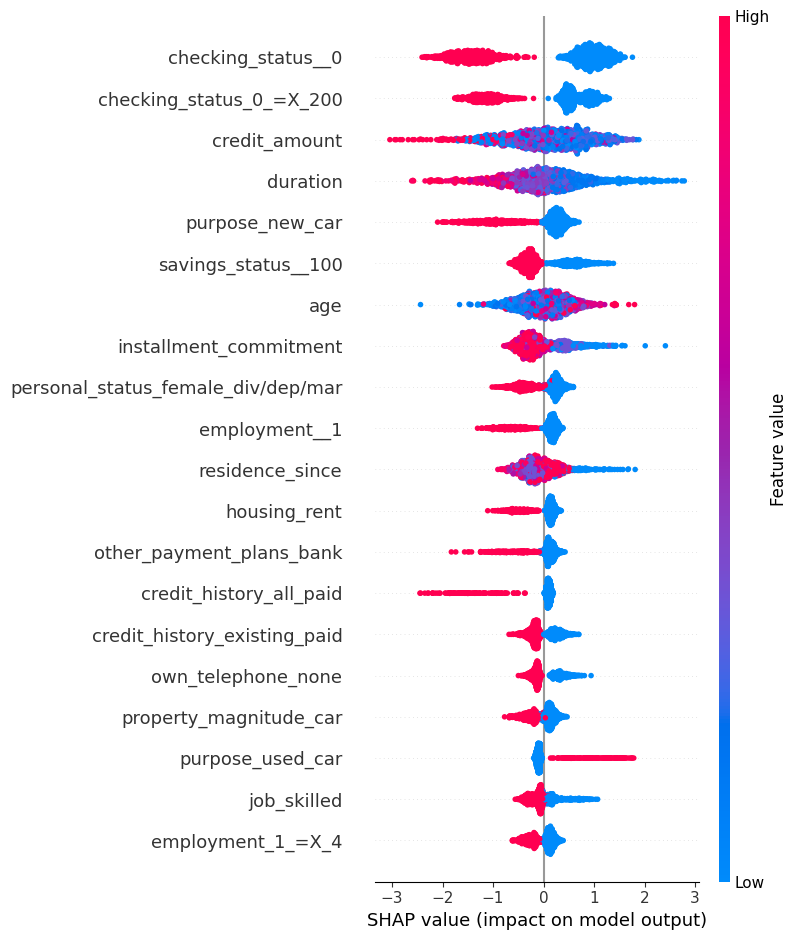

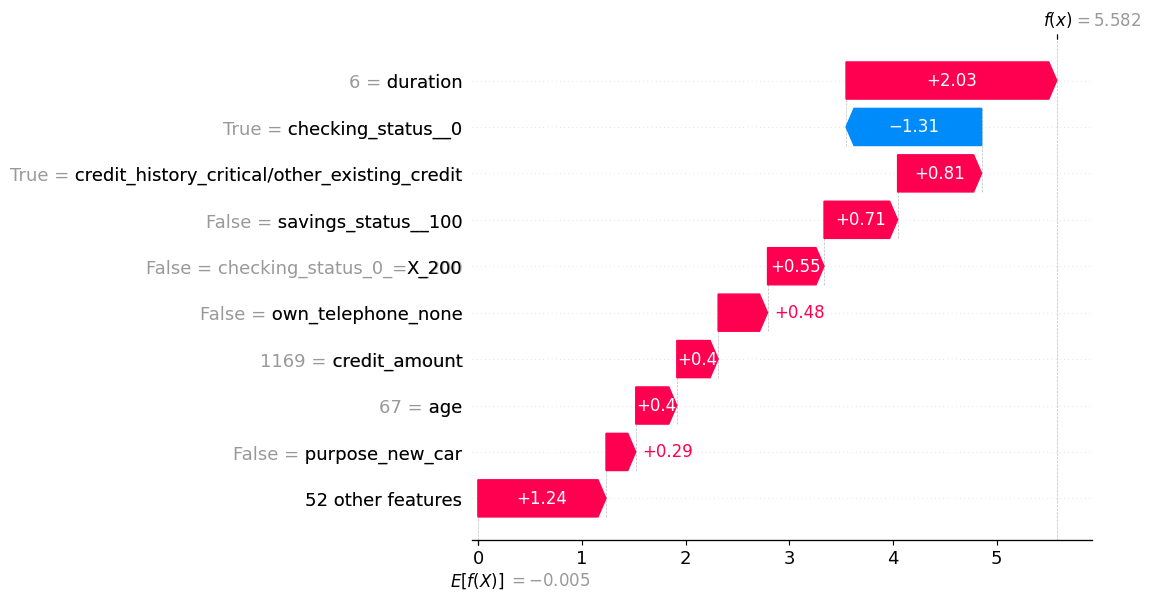

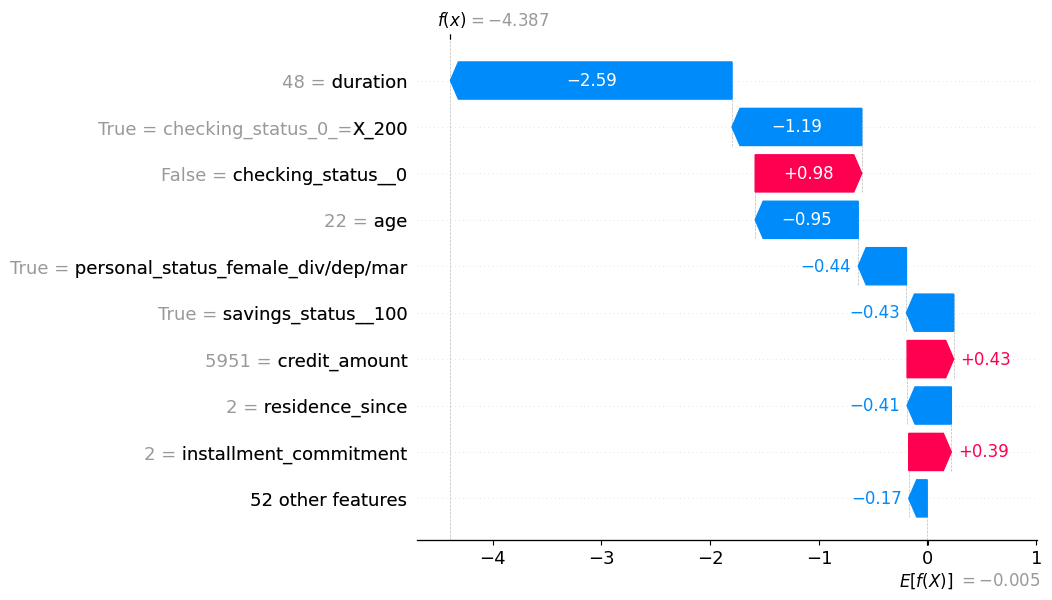

In [ ]:
from xgboost import XGBClassifier
import shap


X_resampled.columns = X_resampled.columns.str.replace('[<>[\] ]', '_', regex=True)


best_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
best_model.fit(X_resampled, y_resampled)


explainer = shap.Explainer(best_model)
shap_values = explainer(X_resampled)


shap.summary_plot(shap_values, X_resampled)


shap.plots.waterfall(shap_values[0])
shap.plots.waterfall(shap_values[1])



**Análise: **

Com objetivo de entender melhor as decisões do modelo, foram aplicados os valores SHAP. Isso resultou em um melhor desempenho.
O Summary Plot destaca o quanto cada variável contribui para o resultado do modelo. As que mais influenciam são:
checking_status_0 e checking_status_0_=X_200: Indicam o status da conta corrente do cliente.

credit_amount: O valor do crédito solicitado.

duration: A duração do empréstimo em meses.

purpose_new_car: O propósito do crédito ser um carro novo.

savings_status_100: O status da conta poupança.

age: A idade do cliente.



Interpretação dos Waterfall Plots para exemplos individuais:

**Exemplo de Cliente 1** (f(x) = 5.582 — Provável bom pagador):
Para este cliente, o modelo indicou uma alta probabilidade de ser um bom pagador, com uma saída de f(x) = 5.582. Os fatores que mais impulsionaram essa previsão foram: a curta duração do crédito (6 meses, com uma contribuição SHAP de +2,03), o status da conta corrente "checking_status_0" como True (+0,81), e um histórico de crédito classificado como crítico ou com outro crédito existente (+0,71). Por outro lado, o fato de o status "checking_status_0_=X_200" ser False teve um impacto negativo (-1,31), mas o conjunto geral das características favoreceu a classificação como "bom pagador".

**Exemplo de Cliente 2** (f(x) = -4.387 — Provável mau pagador):
Neste caso, o modelo previu uma alta probabilidade de inadimplência, com uma saída de f(x) = -4.387. Os principais fatores que contribuíram negativamente para essa previsão foram: o longo prazo do crédito (48 meses, com -2,59), o status da conta corrente "checking_status_0_0_=X_200" como True (-1,19), a idade do cliente (22 anos, -0,95), e "checking_status_0" como False (-0,44). Esses elementos juntos levaram o modelo a classificá-lo como um possível "mau pagador".

**Tomada de Decisão**

Analisando os valores SHAP, os pontos mais críticos para a previsão do risco de crédito são: o status da conta corrente, o valor do crédito, a duração do empréstimo, o propósito do crédito e o status da conta poupança.

Clientes com prazos de crédito mais longos e com o status de conta corrente checking_status_0_0_=X_200 normalmente apresentam valores SHAP negativos, contribuindo para o não pagamento. Com isso, a combinação de baixo saldo em contas poupança com certos motivos do empréstimo deve ser analisada, necessitando de uma análise mais criteriosa antes da aprovação do empréstimo.

**Clusterização (KMeans)**

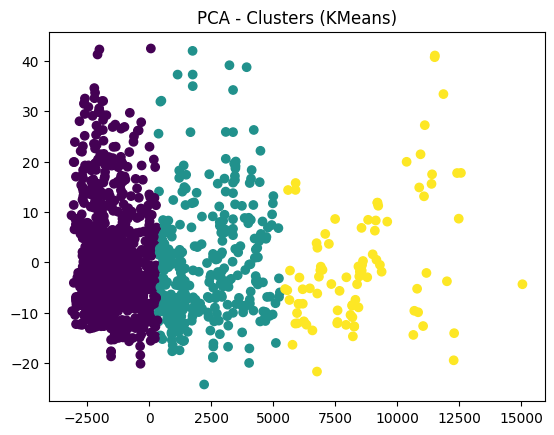

In [ ]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_resampled)

pca = PCA(n_components=2)
components = pca.fit_transform(X_resampled)

plt.scatter(components[:, 0], components[:, 1], c=clusters, cmap='viridis')
plt.title("PCA - Clusters (KMeans)")
plt.show()


**Tabela clusters**

In [ ]:

X_resampled_with_clusters = X_resampled.copy()

X_resampled_with_clusters['cluster'] = clusters

cluster_profiles = X_resampled_with_clusters.groupby('cluster').mean()

print("\n--- Perfis Detalhados dos Clusters (Médias das Características) ---")

print(cluster_profiles.to_string())


--- Perfis Detalhados dos Clusters (Médias das Características) ---
          duration  credit_amount  installment_commitment  residence_since        age  existing_credits  num_dependents  checking_status_0_=X_200  checking_status__0  checking_status__=200  checking_status_no_checking  credit_history_all_paid  credit_history_critical/other_existing_credit  credit_history_delayed_previously  credit_history_existing_paid  credit_history_no_credits/all_paid  purpose_business  purpose_domestic_appliance  purpose_education  purpose_furniture/equipment  purpose_new_car  purpose_other  purpose_radio/tv  purpose_repairs  purpose_retraining  purpose_used_car  savings_status_100_=X_500  savings_status_500_=X_1000  savings_status__100  savings_status__=1000  savings_status_no_known_savings  employment_1_=X_4  employment_4_=X_7  employment__1  employment__=7  employment_unemployed  personal_status_female_div/dep/mar  personal_status_male_div/sep  personal_status_male_mar/wid  personal_status_male

**Outliers com DBSCAN**

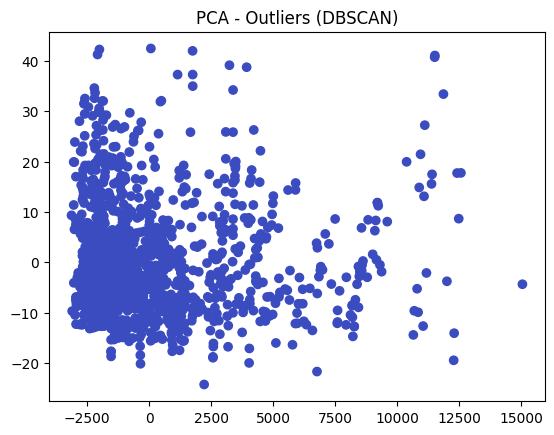

In [ ]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=3, min_samples=5)
outliers = dbscan.fit_predict(X_resampled)

plt.scatter(components[:, 0], components[:, 1], c=outliers, cmap='coolwarm')
plt.title("PCA - Outliers (DBSCAN)")
plt.show()


**Análise: **

Interpretação dos perfis dos clusters:
Analisando as características de cada cluster, observa-se os seguintes perfis:
Cluster 0: Esse grupo representa clientes com um perfil mais comum e equilibrado, geralmente associados a menor risco. Suas características de crédito e duração dos empréstimos tendem a ficar dentro de faixas médias, o que sugere um comportamento financeiro mais estável.

Cluster 1: Os clientes deste cluster se diferenciam dos do Cluster 0 por alguns aspectos específicos, como valores de crédito um pouco diferentes.

Cluster 2: Clientes com perfis mais fora do padrão ou de maior risco, como valores de crédito mais altos ou menores, ou durações de empréstimo específicas

**Outliers**

Analisando a distribuição da classe 'bad' entre os pontos nomeados como outliers e os pontos que pertencem a clusters, observa-se que os outliers tendem a ter uma proporção significativamente maior de clientes classificados como 'bad. Isso sugere que o algoritmo DBSCAN é eficaz em identificar indivíduos que se desviam do comportamento padrão da maioria dos clientes e que essa anormalidade está relacionada com o risco de não pagamento. Assim, os outliers detectados são, de fato, clientes com maior probabilidade de serem maus pagadores.

**Análise Cruzada**

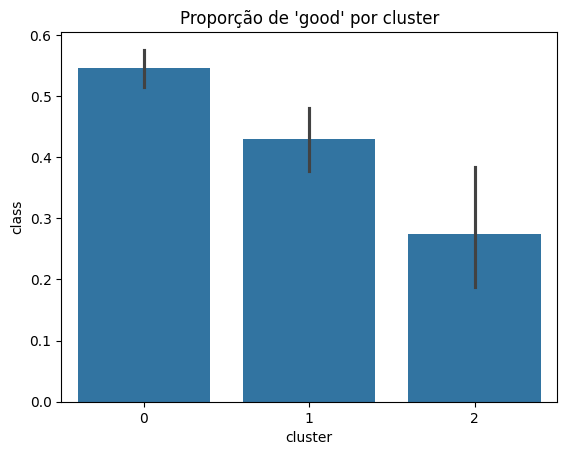

In [ ]:
import seaborn as sns

cluster_df = pd.DataFrame({'cluster': clusters, 'class': y_resampled})
sns.barplot(data=cluster_df, x='cluster', y='class')
plt.title("Proporção de 'good' por cluster")
plt.show()


**Análise: **

A análise da variável "class" com os clusters, mostrou a distribuição de "bons pagadores" em cada grupo.

Interpretação dos agrupamentos mais arriscados:
O Cluster 0 apresenta a maior proporção de "bons pagadores" (aproximadamente 55%), indicando que este é o grupo de menor risco.

O Cluster 1 tem uma proporção média de "bons pagadores" (aproximadamente 42%).

O Cluster 2 tem a menor proporção de "bons pagadores" (aproximadamente 28%), sendo assim, o cluster com mais clientes "maus pagadores".

Com essa análise, observamos que o Cluster 2 é o grupo mais arriscado para a instituição financeira.